In [1]:
from becquerel import Spectrum
import numpy as np
import importlib
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\benhu\\Desktop\\Research\\radwatch-analysis\\ROI.py'>

In [2]:
source_energies = np.array([605, 609, 662, 1460, 2614]);
spectrum = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1904Rockfish.spe'
background = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe'
livetime = 164232 #s
wetweight = 1104.2 #g
spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

roi = ROI.ROI(spec, bgspec, source_energies, 0)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1904Rockfish.spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe


c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a fu

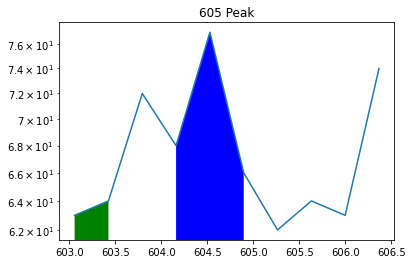

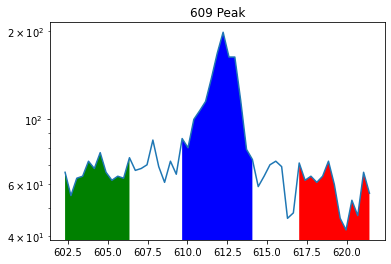

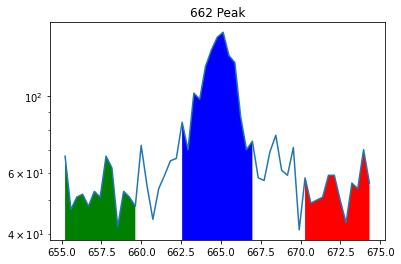

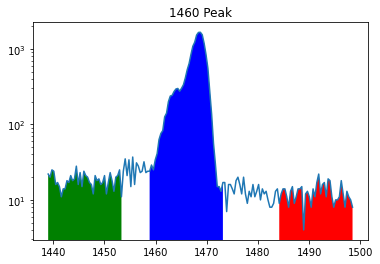

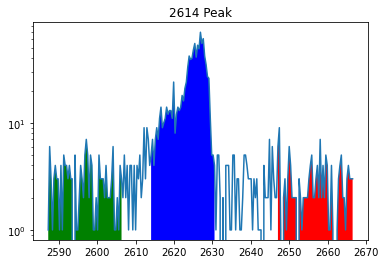

In [3]:
roi.set_sideband(605, 1, [[-2, -1], [-1, 0.5], [1, 2]])
roi.set_sideband(609, 5, [[-2, -1], [-0.5, 0.5], [1, 2]])
roi.set_sideband(662, 5, [[-2, -1], [-0.5, 0.5], [1, 2]])
roi.set_sideband(1460, 15, [[-2, -1], [-0.7, 0.3], [1, 2]])
roi.set_sideband(2614, 20, [[-2, -1], [-0.65, 0.2], [1, 2]])

roi.plot_peak_region(spec, source_energies, 605)
roi.plot_peak_region(spec, source_energies, 609)
roi.plot_peak_region(spec, source_energies, 662)
roi.plot_peak_region(spec, source_energies, 1460)
roi.plot_peak_region(spec, source_energies, 2614)

In [4]:
roi.find_peak_energies()
roi_counts, roi_unc = roi.get_counts()

eff_func = am.Efficiency()
eff_func.set_parameters()

efficiency = []
for i in source_energies:
    efficiency.append(eff_func.get_eff(i))

countrate = [i / livetime for i in roi_counts]
uncrate = [i / livetime for i in roi_unc]

print(efficiency)
print(countrate)
print(uncrate)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


background spec sidebands 76.03870066417872
bg peak counts 181.22556991629267
signal bg 100.5
signal peak 211.0
background spec sidebands 658.3684165840142
bg peak counts 1355.3898393389857
signal bg 778.9999999999999
signal peak 1586.0
background spec sidebands 551.914235654164
bg peak counts 730.605182214984
signal bg 673.5
signal peak 1400.0
background spec sidebands 565.2210082703953
bg peak counts 2198.1521050336337
signal bg 614.5
signal peak 17419.0
background spec sidebands 163.80003434741835
bg peak counts 1146.2834125124944
signal bg 150.50000000000003
signal peak 1062.0
Loaded fit parameters 0-4: [-0.0530201  -0.23393142 -0.49270682 -1.0079565  -4.5553875 ]
Loaded input energies: []
Loaded energy uncertainties: [0.02016385 0.03079805 0.02757461 0.01707092 0.01090811 0.01032225]
[0.019812801529679906, 0.019742405309284897, 0.018854421202205197, 0.01051768041536737, 0.004697785950678424]
[3.235137334920143e-05, 0.0006696537656792138, 0.003335580480291174, 0.09237888415921842, 

In [6]:
sactivity, sactunc = [(i / j) / wetweight for i, j in zip(countrate, efficiency)], [(i / j) / wetweight for i, j in zip(uncrate, efficiency)]
for i, j, k in zip(source_energies, sactivity, sactunc):
    print("Specific activity at", i, "keV:", j, "±", k, "Bq/g (wet weight)")

Specific activity at 605 keV: 1.4787647506297635e-06 ± 6.100887078956333e-06 Bq/g (wet weight)
Specific activity at 609 keV: 3.071867710038409e-05 ± 1.6898157268173744e-05 Bq/g (wet weight)
Specific activity at 662 keV: 0.00016021769375852476 ± 1.5318593650466236e-05 Bq/g (wet weight)
Specific activity at 1460 keV: 0.007954355538233376 ± 7.4529045854225e-05 Bq/g (wet weight)
Specific activity at 2614 keV: -8.332166019116219e-05 ± 5.708954948565072e-05 Bq/g (wet weight)
